In [1]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
X,y = digits["data"], digits["target"]

In [4]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

To know how many digits we have we can run this simple code

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y == i), "times")

digit 0 appear 178 times
digit 1 appear 182 times
digit 2 appear 177 times
digit 3 appear 183 times
digit 4 appear 181 times
digit 5 appear 182 times
digit 6 appear 181 times
digit 7 appear 179 times
digit 8 appear 174 times
digit 9 appear 180 times


Note: datasets loaded by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

we have 1797 digits available, from 0 to 9. Let's define a helper function that will allow us to visualize the digits.

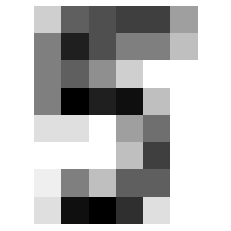

In [7]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(8,8)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[1003])

Let's check the relative label...

In [8]:
y[1003]

5

### Train and test set preparation

Let's first reduce our dataset only to 0 and 1 digits.

In [9]:
X_01 = X[np.any([y == 0,y == 1], axis = 0)]
y_01 = y[np.any([y == 0,y == 1], axis = 0)]

Let's check a couple of digits

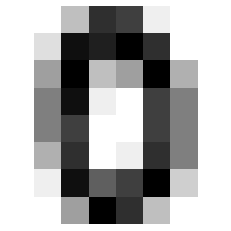

0


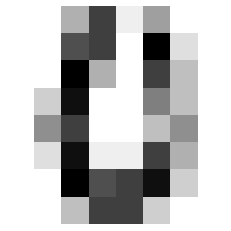

0


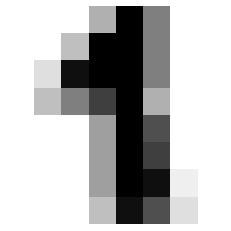

1


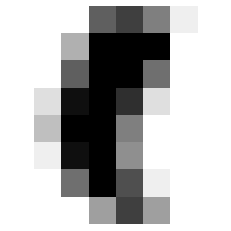

1


In [10]:
plot_digit(X_01[80])
print(y_01[80])

plot_digit(X_01[345])
print(y_01[345])

plot_digit(X_01[87])
print(y_01[87])

plot_digit(X_01[144])
print(y_01[144])

The size of our dataset is

In [11]:
print(X_01.shape)
print(y_01.shape)

(360, 64)
(360,)


In our reduced dataset how many 0 and 1 do we have?

In [12]:
print("number of 0:", np.count_nonzero(y_01 == 0))
print("number of 1:", np.count_nonzero(y_01 == 1))

number of 0: 178
number of 1: 182


Let's shuffle the elements and create a train and a test set. 

In [13]:
shuffle_index = np.random.permutation(X_01.shape[0])
X_01_shuffled, y_01_shuffled = X_01[shuffle_index], y_01[shuffle_index]

train_proportion = 0.7
train_test_cut = int(len(X_01)*train_proportion)

X_train, X_test, y_train, y_test = \
    X_01_shuffled[:train_test_cut], \
    X_01_shuffled[train_test_cut:], \
    y_01_shuffled[:train_test_cut], \
    y_01_shuffled[train_test_cut:]
    
print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of y_test is", y_test.shape)

Shape of X_train is (251, 64)
Shape of X_test is (109, 64)
Shape of y_train is (251,)
Shape of y_test is (109,)


Let's check the proportions of 0 and 1 in our training and test set. In our original set we had the proportion of

In [14]:
np.count_nonzero(y_01 == 0) / np.count_nonzero(y_01 == 1)

0.978021978021978

In our training and test set we have the proportions

In [15]:
print(np.count_nonzero(y_train == 0) / np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_test == 0) / np.count_nonzero(y_test == 1))

0.9763779527559056
0.9818181818181818


So we are pretty close to the same proportion in our original dataset. Note that in this case is not so important since our training set is not so skewed, but normally you would have to do a stratified sampling.

## Normalisation

Let's normalise our data. The pixel will have a value between 0 and 255 (gray values). Let's normalise the value between 0 and 1.

In [16]:
X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

Remember that we need features along the rows, and training cases along the columns. So let's reshape our dataset

In [17]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)
print(X_test_tr.shape)
print(y_test_tr.shape)

dim_train = X_train_tr.shape[1]
dim_test = X_test_tr.shape[1]

print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

(64, 251)
(1, 251)
(64, 109)
(1, 109)
The training dataset has dimensions equal to 251
The test set has dimensions equal to 109


## Helper functions

Now we will define a few helper function that we will put together to build a ```model()``` function that will train our model and give as a result a dictionary with the result. Where relevant we will put the mathematical formula we have used.

### Sigmoid function

This function will calculate the following formula given an input $z$

$$ \displaystyle
\sigma(z) = \frac{1}{1+e^{-z}}
\tag{1}
$$

In [18]:
def sigmoid(z):
    """
    Implement the sigmoid function

    Arguments:
    y -- a scalar (float)

    Return:
    s -- the sigmoid function evaluated on z (as in equation (1))
    """
    s = 1.0 / (1.0 + np.exp(-z))
    
    return s

In [22]:
def initialize(dim):
    """
    Initialise the weights and the bias to tensors of dimensions (dim,1) for w and
    to 1 for b (a scalar)

    Arguments:
    dim -- a scalar (float)

    Return:
    w -- a matrix of dimensions (dim,1) containing all zero
    b -- a scalar = 0
    """
    w = np.zeros((dim,1))
    b = 0
    
    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))
    
    return w,b

The following function ```propagate(w,b,X,Y)``` will calculate 

$$
\displaystyle
\frac{\partial \mathscr{L} (a,y)}{\partial w_j} = \frac{1}{m} X (A-Y)^T
\tag{2}
$$

$$
\displaystyle
\frac{\partial \mathscr{L} (a,y)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}(A_i-Y_i) 
\tag{3}
$$
and
$$
\displaystyle
J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \mathscr{L} (a^{(i)},y^{(i)})
\tag{4}
$$

given
$$
\mathscr{L} (a,y) = -\left[ y \log a + (1-y) \log (1-a) \right]
\tag{5}
$$

Our inputs are the weight $w \in \mathbb{R}^{n_x \times 1}$ ($n_x$ number of features), $b \in \mathbb{R}$, $X \in \mathbb{R}^{n_x \times m}$, $Y \in \mathbb{R}^{1 \times m}$, $m$ is the number of training cases we have.

In [23]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1) (our case 784,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if class 0, 1 if class 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
    dw = 1.0/m*np.dot(X, (A-Y).T) #this is derivative of the cost function with respect to w
    db = 1.0/m*np.sum(A-Y)       #this is the derivative of the cost function with respect to b
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)     
    assert (cost.shape == ())
    
    grads = {"dw": dw, #these values are stored in a dictionary so as to access them later
             "db":db}
    
    return grads, cost

This function actually performs the gradient descent algorithm. It does a loop modifying the weights and the bias at each iteration according to (for an explanation of notation please refer to [this notebook](http://localhost:8888/notebooks/Documents/Data%20Science/Projects/Logistic-Regression-Explained/Logistic%20Regression%20from%20scratch.ipynb#).

$$\displaystyle
w_{[n+1]} = w_{[n]}-\alpha \frac{1}{m} X (A-Y)^T
$$

and

$$\displaystyle
b_{[n+1]} = b_{[n]}-\alpha \frac{1}{m} \sum_{i=1}^{m}(A_i-Y_i)
$$

In [24]:
#We are trying to get the parameters w and b after modifying them using the knowledge of the cost function
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of shape (n_x, m)
    Y -- true "label" vector (containing 0 if class 1, 1 if class 1), of shape (1, m)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []     #This is an empty list created so that it stores all the values later
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)    #we are calling the previously defined function
        
        dw = grads["dw"]   #we are accessing the derivatives of cost with respect to w
        db = grads["db"]   #we are accessing the derivatives of cost with respect to b
        
        w = w - learning_rate*dw   #we are modifying the parameter w so that the cost would reduce in the long run
        b = b - learning_rate*db   #we are modifying the parameter b so that the cost would reduce in the long run
        
        if i % 100 == 0:
            costs.append(cost)    #we are giving all the cost values to the empty list that was created initially
            
        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}    #we are storing this value in the dictionary so that it could be accessed later
    params = {"w": w, "b": b}    #we are storing this value in the dictionary so that it could be accessed later
        
    return params, grads, costs

The function ```predict()``` creates a matrix of dimensions $(1,m)$ that contains the predictions of the model given the input $w$, $b$ and $X$. Each prediction is assigned to class 0 if $\sigma(w^T X+b) > 0.5$ and to class 1 if $\sigma(w^T X+b) \leq 0.5$

In [25]:
def predict (w, b, X):
    '''
    Predict whether the label is 0 or 1 
    
    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of size (n_x, m)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) 
    '''
    
    m = X.shape[1] #alt m = len(X)
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid (np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction
        

Now let's define the ```model()``` function that will put everything together.

In [26]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    return d

## Test of the model

Let's test our model on our datasets containing only the digits 0 and 1.

In [27]:
d = model (X_train_tr, 
           y_train_tr, 
           X_test_tr, 
           y_test_tr, 
           num_iterations = 4000, 
           learning_rate = 0.05, 
           print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.684282
Cost (iteration 200) = 0.675647
Cost (iteration 300) = 0.667180
Cost (iteration 400) = 0.658872
Cost (iteration 500) = 0.650722
Cost (iteration 600) = 0.642725
Cost (iteration 700) = 0.634878
Cost (iteration 800) = 0.627179
Cost (iteration 900) = 0.619625
Cost (iteration 1000) = 0.612212
Cost (iteration 1100) = 0.604937
Cost (iteration 1200) = 0.597799
Cost (iteration 1300) = 0.590793
Cost (iteration 1400) = 0.583918
Cost (iteration 1500) = 0.577170
Cost (iteration 1600) = 0.570547
Cost (iteration 1700) = 0.564046
Cost (iteration 1800) = 0.557665
Cost (iteration 1900) = 0.551400
Cost (iteration 2000) = 0.545251
Cost (iteration 2100) = 0.539213
Cost (iteration 2200) = 0.533286
Cost (iteration 2300) = 0.527465
Cost (iteration 2400) = 0.521750
Cost (iteration 2500) = 0.516138
Cost (iteration 2600) = 0.510626
Cost (iteration 2700) = 0.505213
Cost (iteration 2800) = 0.499896
Cost (iteration 2900) = 0.494674
Cost (iteration 3000) 

So we get an accuracy of roughly 99%. Pretty good. 
Let's see how the confusion matrix look like. To make it easier let's use the ```confusion_matrix()``` function from the package ```sklearn.metrics```.

In [28]:
y_pred_tr = d["Y_prediction_test"]
y_pred_tr_ravel = y_pred_tr.ravel()
y_test_tr_ravel = y_test_tr.ravel()

from sklearn.metrics import confusion_matrix

confusion_matrix (y_test_tr_ravel, y_pred_tr_ravel)

array([[54,  0],
       [ 1, 54]], dtype=int64)

Note that this works really well since 0 and 1 are easy to distinguish. If you check all the digits you will see that (for example) two of the digits that are the most difficult (relatively) to distinguish are 3 and 5. The same notebook can be run with different digits to check this.

## Cost function vs. number of iterations

Let's see how the cost function decrease with the number of iterations. We have the value of the cost function every $100$ iterations so we can easily plot it.

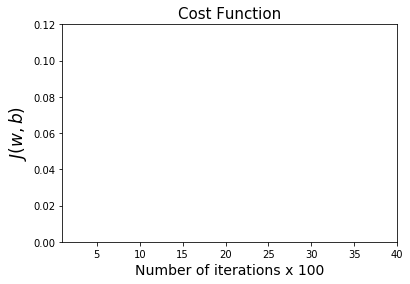

In [29]:
plt.plot(d["costs"])
plt.xlim([1,40])
plt.ylim([0,0.12])
plt.title("Cost Function",fontsize = 15)
plt.xlabel("Number of iterations x 100", fontsize = 14)
plt.ylabel("$J(w,b)$", fontsize = 17)
plt.show()